In [1]:
# Python3.6
from eccentric.synthetic import SyntheticFlares, HotJupiterHost
from eccentric.psimodel import PSI_Model

import matplotlib.pyplot as plt
%matplotlib inline

### Create a Hot Jupiter host and a time series observations:

In [15]:

sf = SyntheticFlares(hjhost=HotJupiterHost(period=15, a=1., e=.3, first_periastron_time=7000.,), 
                     #period in days, a in AU, first periastron time must occur after first_observation time...
                     observation_deltat=105, # in days
                     cadence=6, #observations per hour
                     flares_per_day=3, #in days^-1
                     first_observation_time=6999)# day
print("Observation time series: ", sf.observation_time[:5], 
      "\nPoisson parameter for the time series converted from flares_per_day: ", sf.poisson_parameter)

Observation time series:  [6999.         6999.00694444 6999.01388889 6999.02083333 6999.02777778] 
Poisson parameter for the time series converted from flares_per_day:  0.020833333333333332


### Generate some synthetic flares

The default model is a Gaussian distribution at phase $\phi=0.7$, when periastron is at $\phi=0.5$.

In [21]:
phase = .7
sf.generate_synthetic_flares(model="Gauss",
                             size=3, # number of SPI flares per periastron passage
                             width=0.02, # in days (standard deviation)
                             phase=phase) #  can be chosen from 0 to 1


In [22]:
sf.all_flares.tail()

,source,peak_time,stacked_peak_time
14,spi,7093.041667,0.269444
15,spi,7063.000000,0.266667
16,spi,7032.993056,0.266204
17,spi,7033.006944,0.267130
18,spi,7003.034722,0.268981


### Instantiate a model for flaring SPI with given data

In [28]:
spi = PSI_Model(major_axis_a=sf.hjhost.major_axis_a,
                eccentricity=sf.hjhost.eccentricity,
                data=sf.all_flares.stacked_peak_time,
                n_orbits=sf.observation_deltat / sf.hjhost.period)

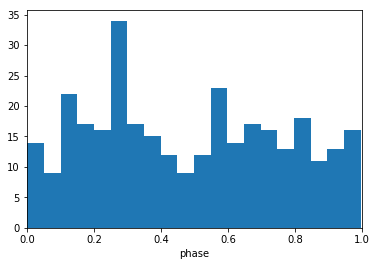

In [29]:
plt.hist(sf.all_flares.stacked_peak_time, bins=20)
plt.xlabel("phase")
plt.xlim(0,1);

In [26]:
spi.estimate_two_parameters()
# gives base intensity and peak scaling factor

(44.36145113192588, 3.5567753984038792)

In [27]:
# Wann ist der Peak?
# What if I do not have full periods covered?